In [11]:
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

## Check for Submission Distribution
현재 자신의 모델이 잘 예측되었는지 시각적으로 확인하기 위한 코드입니다.  
해당 코드는 'no-relation으로 예측한 결과가 적으면, 그만큼 다른 label을 예측할 수 있기에 좋은 성능을 기대할 수 있을 것이다'라는 가설을 바탕으로 작성되었습니다.  
비교를 위해 리더보드에서 f1-score 70점을 달성한 재학님의 모델 예측 결과와 현재 자신의 submission의 분포를 비교할 수 있습니다.  
- 해당 코드는 distribution 확인을 위한 코드입니다. 기준 예측 결과는 추후 개선할 수 있습니다. 

In [53]:
predict_jh = pd.read_csv("./prediction/submission_jh.csv")  # f1_score: 70점 
predict = pd.read_csv("./prediction/submission.csv")
predict.head()

,id,pred_label,probs
0,0,no_relation,"[0.6360355019569397, 0.0046951184049248695, 0...."
1,1,per:alternate_names,"[0.08260286599397659, 0.0009742944967001677, 0..."
2,2,no_relation,"[0.9879343509674072, 0.00030571941169910133, 0..."
3,3,no_relation,"[0.870674729347229, 0.0004617486265487969, 0.0..."
4,4,no_relation,"[0.9620708227157593, 0.00027118768775835633, 0..."


In [104]:
# first_dataset
label_jh = predict_jh.groupby('pred_label').count().sort_values(by = 'id', ascending=False)
label_jh.reset_index(level=['pred_label'], inplace = True)
label_jh.drop('probs', axis=1, inplace=True)
label_jh.columns = ["pred_label", "count"]

In [106]:
# second_dataset
label = predict.groupby('pred_label').count().sort_values(by = 'id', ascending=False)
label.reset_index(level=['pred_label'], inplace = True)
label.drop('probs', axis=1, inplace=True)
label.columns = ["pred_label", "count"]

### 1. Distribution

Text(0.5, 1.0, 'Submission Distribution')

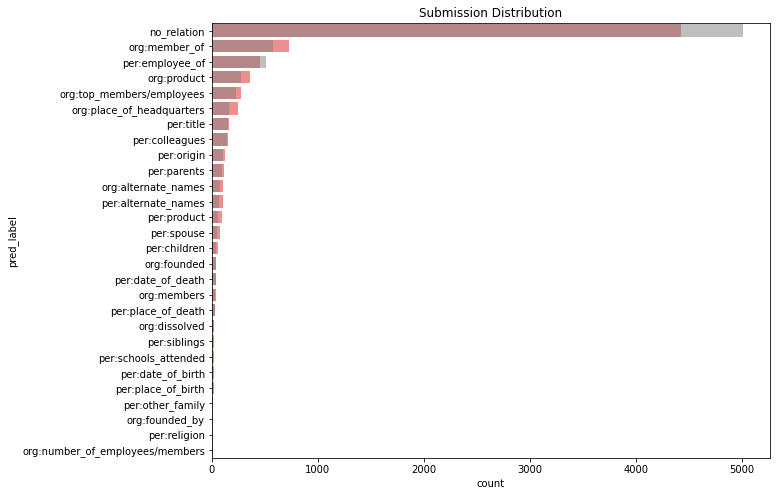

In [117]:
# 병렬적으로 확인하고 싶다면, subplot을 1,2로 주고 0ax 부분을 주석해제시키면 됩니다. 
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
sns.barplot(y='pred_label', x='count', data=label_jh, # ax = axes[0],
              color='red',alpha=0.5 ) # pallete:

sns.barplot(y='pred_label', x='count', data=label, # ax = axes[1]
              color='gray',alpha=0.5 )
plt.title("Submission Distribution")

### 2. DIfference

In [136]:
diff = label_jh['count'] - label['count']
diff_df =pd.DataFrame({"pred_label": label_jh['pred_label'], "diff":diff})

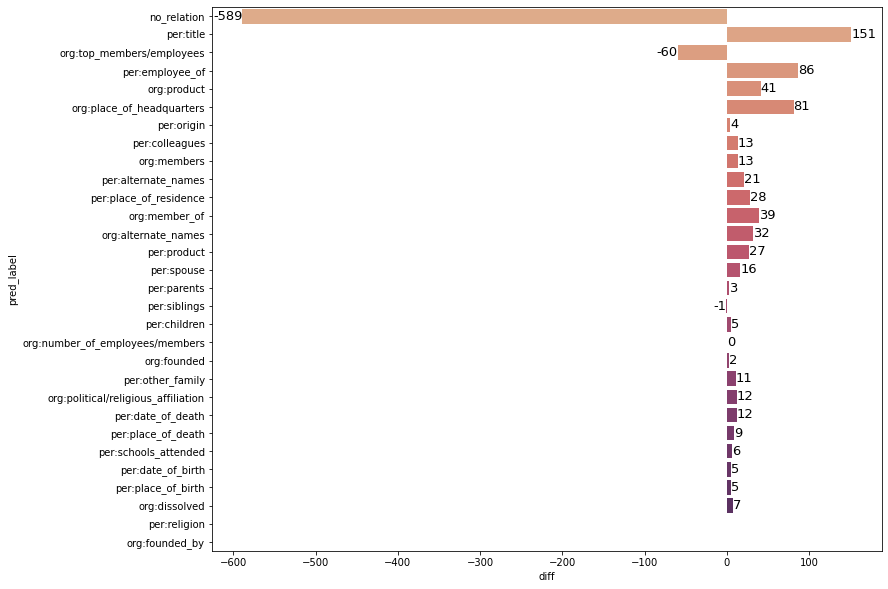

In [165]:
# 병렬적으로 확인하고 싶다면, subplot을 1,2로 주고 0ax 부분을 주석해제시키면 됩니다. 
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(y='pred_label', x='diff', data=diff_df, # ax = axes[0],
              palette='flare')

for i in ax.containers:
    ax.bar_label(i, fontsize=13)